<a href="https://colab.research.google.com/github/Chirobocea/Artificial-Intelligence/blob/main/Laborator_12_(regresie).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementari regresie

In scikit-learn avem implementate modele pentru regresie liniara, inclusiv pentru regresia cu regularizare:

- regresia Ridge: regularizare cu norma L2 a vectorului de ponderi https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


- regresia Lasso: regularizare cu norma L1 a vectorului de ponderi https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Parametrul `alpha` este ponderea termenului de regularizare (in curs notat cu `lambda`)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# definirea modelelor
linear_regression_model = LinearRegression()
ridge_regression_model = Ridge(alpha=1)
lasso_regression_model = Lasso(alpha=1)


### Date

predictia preturilor de masini

n = 4879 exemple de antrenare.

In [ ]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_lab6.zip
!unzip data_lab6.zip

--2022-05-10 11:09:07--  https://fmi-unibuc-ia.github.io/ia/Data/data_lab6.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.109.153, 185.199.111.153, 185.199.110.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55791 (54K) [application/zip]
Saving to: ‘data_lab6.zip’

data_lab6.zip       100%[===================>]  54.48K  --.-KB/s    in 0.01s   

2022-05-10 11:09:07 (5.07 MB/s) - ‘data_lab6.zip’ saved [55791/55791]

Archive:  data_lab6.zip
  inflating: data/prices.npy         
  inflating: data/training_data.npy  


In [ ]:
import numpy as np
from sklearn.utils import shuffle
# load training data
data = np.load('data/training_data.npy')
prices = np.load('data/prices.npy')
# print the first 4 samples

Caracteristici:
1. anul fabricației
2. numărul de kilometri
3. mileage (avg)
4. motor
5. putere
6. numărul de locuri
7. numărul de proprietari (valori între 1 și 4)
8-12. tipul de combustibil - fiind 5 tipuri de combustibil, acesta a fost recodat
într-un one-hot vector de 5 componente.
13-14. tipul de transmisie - fiind 2 tipuri de transmisie, acesta a fost recodat
într-un one-hot vector de 2 componente. 10 - „Manual”; 01 - ”Automatic”.

In [ ]:
print('The first 4 samples are:\n ', data[:4])
print('The first 4 prices are:\n ', prices[:4])
# shuffle
data, prices = shuffle(data, prices, random_state=0)

The first 4 samples are:
  [[2.0150e+03 4.1000e+04 1.9670e+01 1.5820e+03 1.2620e+02 5.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0110e+03 4.6000e+04 1.8200e+01 1.1990e+03 8.8700e+01 5.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0120e+03 8.7000e+04 2.0770e+01 1.2480e+03 8.8760e+01 7.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0130e+03 8.6999e+04 2.3080e+01 1.4610e+03 6.3100e+01 5.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]]
The first 4 prices are:
  [12.5  4.5  6.   3.5]


### Vizualizarea datelor

In [ ]:
from matplotlib import pyplot as plt

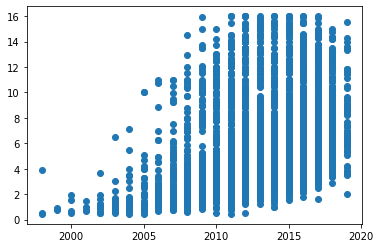

In [ ]:
plt.scatter(data[:,0], prices) # anul fabricatiei vs pret 

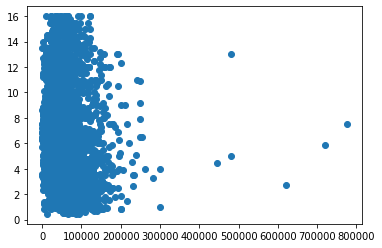

In [ ]:
plt.scatter(data[:,1], prices) # numarul de kilometri vs pret 

### Normalizarea caracteristiclor

In [ ]:
print(data.mean(axis=0))
print(data.std(axis=0))

[2.0131943e+03 5.9280344e+04 1.8832146e+01 1.4802327e+03 9.7857353e+01
 5.2693176e+00 1.2076246e+00 0.0000000e+00 4.7673702e-01 5.2326298e-01
 0.0000000e+00 0.0000000e+00 8.2496411e-01 1.7503586e-01]
[3.2371438e+00 3.9374203e+04 4.0842896e+00 4.6790396e+02 3.5455849e+01
 7.6322055e-01 4.6183684e-01 0.0000000e+00 4.9946213e-01 4.9946213e-01
 0.0000000e+00 0.0000000e+00 3.7999901e-01 3.7999901e-01]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True) 
data_scaled = scaler.fit_transform(data[:,2:5]) # standardizam caracteristicile continue

In [ ]:
StandardScaler??

In [ ]:
print(data_scaled.mean(axis=0)) # almost zero
print(data_scaled.std(axis=0)) # almost one

[-1.1223974e-08  2.5502853e-08  1.0455857e-08]
[0.99999964 1.000003   0.9999978 ]


In [ ]:
# Normalizare min-max pentru caracteristicile discrete
# obtinem valori intre 0 si 1

In [ ]:
def normalize_min_max(x):
  scale = max(x) - min(x)
  x = (x - min(x)) / scale
  return x


In [ ]:
normalize_min_max(data[:,0])

array([0.9047619 , 0.8095238 , 0.95238096, ..., 0.47619048, 0.71428573,
       0.71428573], dtype=float32)

### Calculul erorii / performantei

- Mean squared error

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

- Mean absolute error

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [ ]:
# calcularea valorii MSE și MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Exemplu apeluri:
# mse_value = mean_squared_error(y_true, y_pred)
# mae_value = mean_absolute_error(y_true, y_pred)

# Exercitii (1p)

1. Pentru fiecare dintre caracteristicile: 

- mileage
- motor
- putere
- numărul de locuri

afisati un plot care are caracteristica pe axa Ox si pretul pe axa Oy. Ce fel de relatii exista intre caracteristici si etichete?

In [ ]:
from matplotlib import pyplot as plt

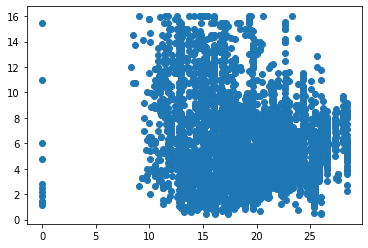

In [ ]:
plt.scatter(data[:,2], prices) 

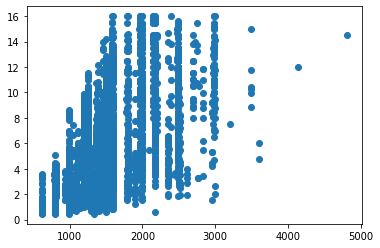

In [ ]:
plt.scatter(data[:,3], prices) 

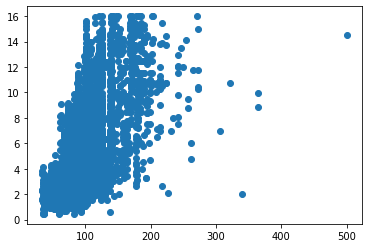

In [ ]:
plt.scatter(data[:,4], prices) 

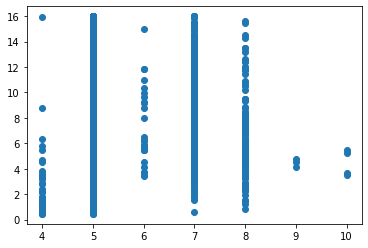

In [ ]:
plt.scatter(data[:,5], prices) 

2. Impartiti datele intr-o multime de antrenare si o multime de testare, pastrand 80\% din date pentru antrenare si 20\% pentru testare.

In [ ]:
data, prices = shuffle(data, prices, random_state=0)

n = int(data.shape[0] * 0.8)

X_train = data[:n]
X_test = data[n:]

Y_train = prices[:n]
Y_test = prices[n:]

3. Folosind mulțimea de antrenare din setul de date Car Price Prediction
antrenați un model de regresie liniară multipla (fara regularizare) pentru a prezice pretul. Antrenati pe multimea de antrenare. (folosind functia `fit()` a modelului implementat in `sklearn`.)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

4. Calculati pe multimea de test eroarea MAE si MSE.

In [ ]:
# calcularea valorii MSE și MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse_value = mean_squared_error(Y_test, Y_pred)
mae_value = mean_absolute_error(Y_test, Y_pred)
print(mse_value)
print(mae_value)

2.948831
1.293665


Incercati sa normalizati caracteristicile anterior antrenarii folosind normalizare min-max, apoi reantrenati. Cu ce varianta obtineti performanta mai buna?


In [ ]:
data, prices = shuffle(data, prices, random_state=0)

n = int(data.shape[0] * 0.8)

X_train = data[:n]
X_test = data[n:]

Y_train = prices[:n]
Y_test = prices[n:]

In [ ]:
#Normalizare?? refresh

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [ ]:
mse_value = mean_squared_error(Y_test, Y_pred)
mae_value = mean_absolute_error(Y_test, Y_pred)
print(mse_value)
print(mae_value)

3.0973592
1.3384069


6. Incercati modele regularizate de regresie pe aceleasi seturi de date: Ridge, Lasso. Testati fiecare dintre ele pe multimea de test.

In [ ]:
model = Ridge(alpha=1)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse_value = mean_squared_error(Y_test, Y_pred)
mae_value = mean_absolute_error(Y_test, Y_pred)
print(mse_value)
print(mae_value)

3.759197
1.3741585


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.8147e-13): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
model = Lasso(alpha=1)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse_value = mean_squared_error(Y_test, Y_pred)
mae_value = mean_absolute_error(Y_test, Y_pred)
print(mse_value)
print(mae_value)

4.15544
1.4139047
